In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv('C:\\Users\\ashwi\\Downloads\\country_vaccinations.csv')

In [49]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name
0,Albania,ALB,10/01/2021,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health
1,Albania,ALB,11/01/2021,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health
2,Albania,ALB,12/01/2021,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health
3,Albania,ALB,13/01/2021,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health
4,Albania,ALB,14/01/2021,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3555 entries, 0 to 3554
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              3555 non-null   object 
 1   iso_code                             3283 non-null   object 
 2   date                                 3555 non-null   object 
 3   total_vaccinations                   2341 non-null   float64
 4   people_vaccinated                    1940 non-null   float64
 5   people_fully_vaccinated              1278 non-null   float64
 6   daily_vaccinations_raw               1972 non-null   float64
 7   daily_vaccinations                   3420 non-null   float64
 8   total_vaccinations_per_hundred       2341 non-null   float64
 9   people_vaccinated_per_hundred        1940 non-null   float64
 10  people_fully_vaccinated_per_hundred  1278 non-null   float64
 11  daily_vaccinations_per_million

In [51]:
df.select_dtypes(include=['object']).isnull().sum()

country          0
iso_code       272
date             0
vaccines         0
source_name      0
dtype: int64

In [52]:
df.loc[df.iso_code.isnull(), 'country'].value_counts()

Northern Ireland    68
England             68
Wales               68
Scotland            68
Name: country, dtype: int64

<AxesSubplot:>

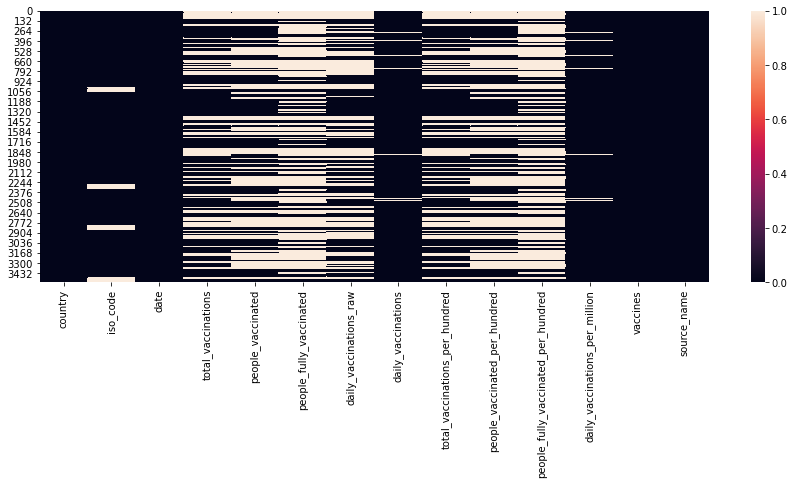

In [53]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull())

In [54]:
# All the missing data will be filled with 0 rather than null
# This will allow us to have the datatypes as integers
# Some of the ISO codes are missing, this will be dealt with seperately
df[df['iso_code'].isnull()]['country'].value_counts()

Northern Ireland    68
England             68
Wales               68
Scotland            68
Name: country, dtype: int64

In [55]:
#It seems that the ISO Code for these 4 countries are mssing.
#All these countries are part of United Kingdom
#Using the weblink I found the ISO Code for UK which is GBR
df['iso_code'].fillna('GBR', inplace=True)
df.fillna(0, inplace=True)
#df['date'] = pd.to_datetime(df['date'])
#df = df.sort_values('date', ascending=True)
#df['date'] = df['date'].dt.strftime('%m-%d-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3555 entries, 0 to 3554
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              3555 non-null   object 
 1   iso_code                             3555 non-null   object 
 2   date                                 3555 non-null   object 
 3   total_vaccinations                   3555 non-null   float64
 4   people_vaccinated                    3555 non-null   float64
 5   people_fully_vaccinated              3555 non-null   float64
 6   daily_vaccinations_raw               3555 non-null   float64
 7   daily_vaccinations                   3555 non-null   float64
 8   total_vaccinations_per_hundred       3555 non-null   float64
 9   people_vaccinated_per_hundred        3555 non-null   float64
 10  people_fully_vaccinated_per_hundred  3555 non-null   float64
 11  daily_vaccinations_per_million

In [56]:
df.select_dtypes(include=['object']).isnull().sum()

country        0
iso_code       0
date           0
vaccines       0
source_name    0
dtype: int64

In [57]:
pd.isnull(df).sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
dtype: int64

In [58]:
df.to_csv('Vaccination.csv', index=False)